# Importing the relevent libararies

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading the dataframes

In [20]:
historical_transaction_data = pd.read_csv("../Datasets/Historical-transaction-data.csv")
store_info_data = pd.read_csv("../Datasets/Store-info.csv")
test_df = pd.read_csv("../Datasets/Testing-data.csv")

In [21]:
historical_transaction_data.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


In [22]:
store_info_data.head()

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low


In [23]:
test_df.head()

,shop_id,shop_profile
0,SHOP046,NaN
1,SHOP024,NaN
2,SHOP023,NaN
3,SHOP097,NaN
4,SHOP044,NaN


# Working with item_description

In [24]:
historical_transaction_data["item_description"].unique()

array(['ORANGE BARLEY 1.5L', 'GINGER BEER 1.5L', 'TONIC PET 500ML',
       'CREAM SODA 1L', 'STRAWBERRY MILK 180ML', 'CREAM SODA 1.5L',
       'TWISTEE APPLE 1L', 'FIT O MIXED FRUIT 200ML', 'SODA PET 1.5L',
       'FIT O MIXED FRUIT 1L', 'KIK COLA 1L', 'LEMONADE 500ML',
       'FIT O ORANGE 1L', 'NECTO 1.5L', 'LEMONADE 1.5L', 'GINGER BEER 1L',
       'FIT O MANGO 200ML', 'FIT O MANGO 1L', 'CREAM SODA 500ML',
       'FIT O ORANGE 200ML', nan, 'CREAM SODA APPLE POP 1L',
       'BOTTLED DRINKING WATER 500ML', 'SODA 500ML', 'GINGER BEER 500ML',
       'SODA 1L', 'NECTO 500ML', 'ORANGE CRUSH 500ML',
       'BOTTLED DRINKING WATER 1.5L', 'NECTO 1L',
       'GINGER BEER SUGAR FREE 500ML', 'ORANGE CRUSH 1.5L',
       'DRY GINGER ALE PET 500ML', 'LEMONADE 1L', 'ORANGE CRUSH 1L',
       'GINGER BEER 400ML', 'CHOCOLATE MILK 180ML', 'LIME CRUSH JUICE 1L'],
      dtype=object)

In [25]:
historical_transaction_data["item_description"].nunique()

37

In [26]:
train_df = historical_transaction_data.copy(deep=True)

In [27]:
train_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


## Splitting the data into item_name and item_quantity

In [28]:
train_df[['item_name', 'item_quantity']] = train_df['item_description'].str.rsplit(' ', n=1, expand=True)

In [29]:
train_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_quantity
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2,ORANGE BARLEY,1.5L
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2,GINGER BEER,1.5L
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2,TONIC PET,500ML
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2,CREAM SODA,1L
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5,STRAWBERRY MILK,180ML


### Convert all the values in the item_quantity to liters

In [30]:
def convert_to_liters(value):
    try:
        if value[-2:] == "ML":
            # print(value[:-2])
            return float(value[:-2])/1000
        else:
            return float(value[:-1])
    except:
        # print(value)
        return np.NaN
        # raise("Error")

In [31]:
train_df['item_quantity_in_liters'] = train_df['item_quantity'].apply(lambda x: convert_to_liters(x))

In [32]:
train_df['item_quantity_in_liters'].head()

0    1.50
1    1.50
2    0.50
3    1.00
4    0.18
Name: item_quantity_in_liters, dtype: float64

In [33]:
train_df.dtypes

item_description            object
transaction_date            object
invoice_id                 float64
customer_id                 object
shop_id                     object
item_price                   int64
quantity_sold                int64
item_name                   object
item_quantity               object
item_quantity_in_liters    float64
dtype: object

### Drop the item_quantity column

In [34]:
train_df.drop(['item_quantity'], axis=1, inplace=True)

In [35]:
train_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_quantity_in_liters
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2,ORANGE BARLEY,1.50
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2,GINGER BEER,1.50
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2,TONIC PET,0.50
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2,CREAM SODA,1.00
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5,STRAWBERRY MILK,0.18


# Data Visualization

## Plotting sales trends

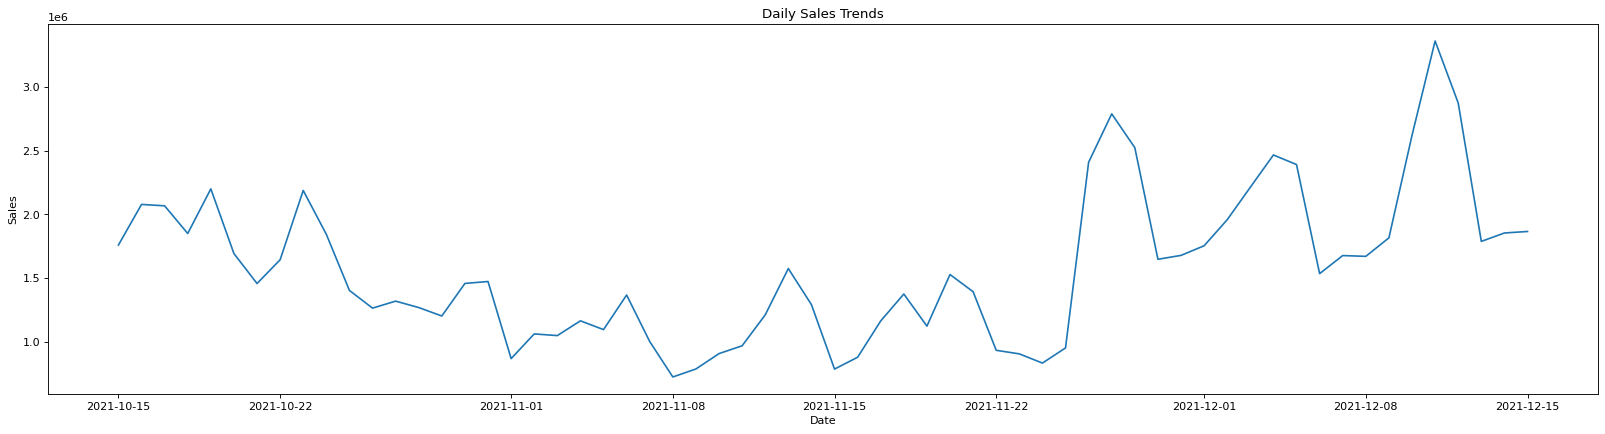

In [54]:
historical_transaction_data['transaction_date'] = pd.to_datetime(historical_transaction_data['transaction_date'])

daily_sales = historical_transaction_data[historical_transaction_data["transaction_date"].dt.year == 2021].groupby('transaction_date')['item_price'].sum()

plt.figure(figsize=(25, 6), dpi=80)
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Sales Trends")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()